<a href="https://colab.research.google.com/github/RoseBorges44/data_science/blob/main/Wordcloud_Helloween.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

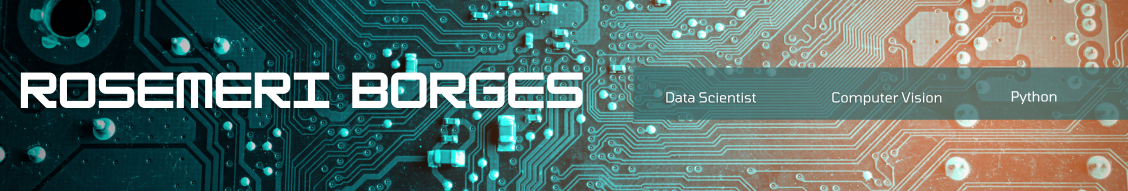

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
imagem = cv2.imread('265.png')
cv2_imshow(imagem)

# **WORDCLOUD da Banda Helloween**

## Sobre a WordCloud

A WordCloud, ou nuvem de palavras, é uma representação visual das palavras mais frequentes em um texto, sendo amplamente utilizada para resumir e visualizar a frequência das palavras em conjuntos de dados. A forma da nuvem é determinada pelo tamanho das palavras, com as mais frequentes exibidas em uma fonte maior e as menos frequentes em um tamanho menor. Essas palavras são geralmente dispostas aleatoriamente na nuvem, mas também podem ser organizadas para criar uma forma específica, se desejado.

A WordCloud é uma ferramenta útil para identificar rapidamente palavras-chave e temas principais em um texto, sendo comumente empregada em análises de sentimentos, mineração de dados, pesquisas de opinião e resumos visuais de grandes volumes de informações. Para criar uma WordCloud, é necessário processar o texto e remover palavras comuns, como artigos e preposições, que não contribuem significativamente para a análise. Em seguida, calcula-se a frequência de cada palavra e define-se seu tamanho proporcional na nuvem.

No Colab, utilizaremos a linguagem de programação Python, que é amplamente escolhida para trabalhar com WordClouds devido à sua facilidade de uso e à disponibilidade de bibliotecas poderosas. No ambiente Colab, podemos aproveitar as vantagens do Python e utilizar bibliotecas como wordcloud, matplotlib e nltk para criar e visualizar nossas WordClouds.

Com essas bibliotecas, podemos processar o texto, calcular a frequência das palavras e gerar visualizações atraentes. O Colab permite instalar as bibliotecas necessárias, importá-las no código Python e começar a criar as WordClouds desejadas. Após a criação, é possível exibi-las usando a biblioteca matplotlib ou salvá-las como imagens para uso futuro. O Python e o Colab fornecem uma poderosa combinação para explorar e criar WordClouds de maneira eficiente e eficaz, permitindo obter insights valiosos a partir de dados textuais e criar visualizações impactantes.



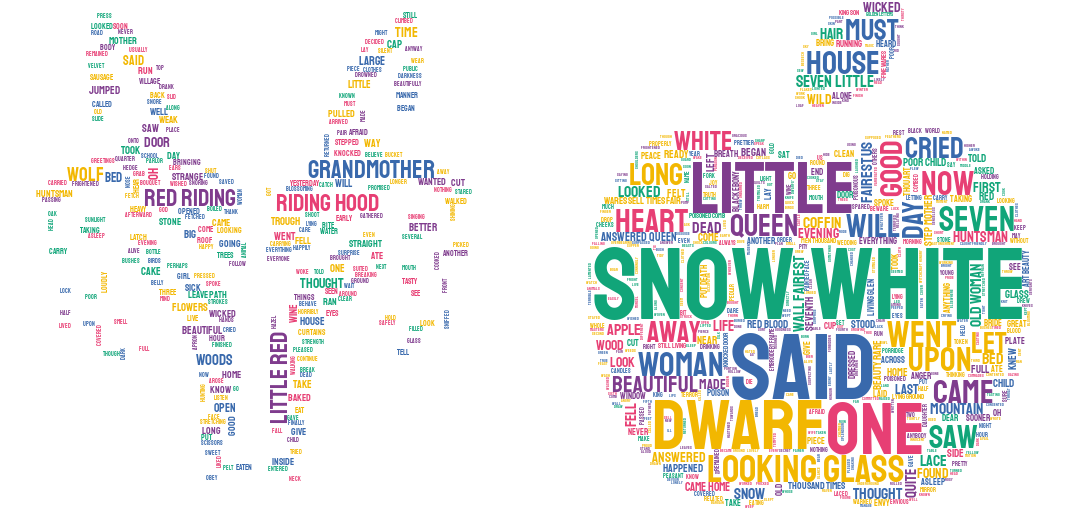

In [ ]:
imagem = cv2.imread('cloud.png')
cv2_imshow(imagem)

## Objetivo


O objetivo deste projeto é analisar os dados compilados de todas as músicas da banda Helloween, a fim de identificar as palavras mais utilizadas em suas composições e destacar os temas abordados em suas letras.

Além de obter insights sobre as principais mensagens transmitidas pela banda, buscamos também desmistificar a ideia de que as bandas de heavy metal se limitam a falar apenas de temas "downs" ou negativos.

Através dessa análise, pretendemos mostrar a diversidade de temas e emoções presentes nas letras do Helloween, abrangendo desde reflexões existenciais e críticas sociais até histórias épicas e fantasiosas.

Ao apresentar os resultados de maneira visual, por meio de uma nuvem de palavras, iremos evidenciar essa variedade temática, desconstruindo estereótipos e demonstrando a riqueza lírica que permeia o universo do heavy metal.

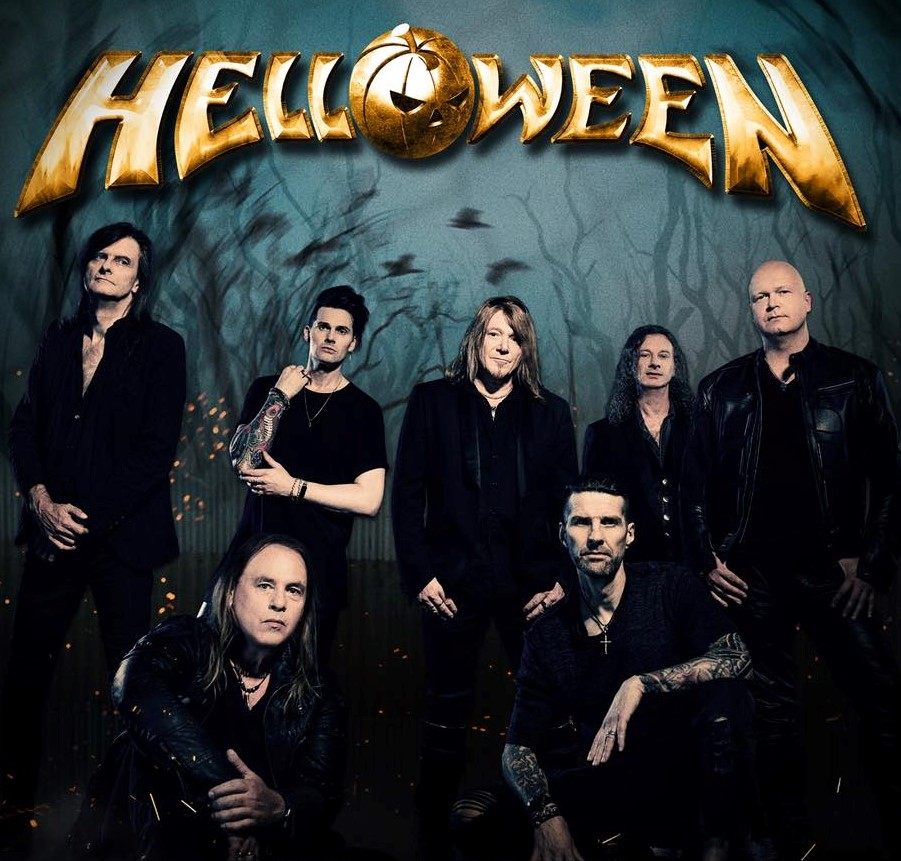

In [ ]:
imagem = cv2.imread('/content/HALL1.jpg')
cv2_imshow(imagem)

## A Banda Helloween

A banda Helloween é uma referência icônica do heavy metal, conhecida por sua energia contagiante e estilo único. Surgida na década de 1980, a banda alemã conquistou uma legião de fãs ao longo dos anos, tornando-se uma das mais influentes no cenário do metal melódico (para os fãs é heavy metal, inadimissível falar que helloween é metal melódico).

Com suas composições cativantes, riffs poderosos e vocais marcantes, o Helloween marcou época com álbuns clássicos como "Keeper of the Seven Keys" e "The Time of the Oath".


Sua habilidade de unir melodias cativantes com um som pesado e veloz se tornou uma marca registrada, inspirando gerações de músicos e estabelecendo um legado duradouro no mundo do metal.

Desde então, o Helloween continua a empolgar multidões com seu som poderoso e performances energéticas, provando que sua música transcende gerações e fronteiras.



# DADOS

## Obtenção dos Dados


Os dados utilizados para o exercício de criação da WordCloud foram extraídos do acervo do site **MLDb - Music Lyrics Database** http://www.mldb.org

Esse site é uma fonte de referência que reúne listas com letras de músicas de diversos artistas e gêneros musicais.

A base de músicas do **Helloween** está atualizada até o album: Keeper Of The Seven Keys - The Legacy (2005)



## Importação dos Dados e das Bibliotecas


Para começar, instale a biblioteca `wordcloud` caso você não tenha, e siga os passos abaixo.

In [ ]:
# instalar wordcloud caso você não tenha
!pip install wordcloud -q

In [ ]:
# importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup
import pandas as pd
import re
import requests

In [ ]:
# Rodando o comando ! pip install para carregar as bibliotecas necessárias
! pip install notebook wordcloud pillow numpy bs4 tdqm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=899075917dcfa76e545e85dae3b940318b0761b3b5f9ea084b889337d823a69e
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for tdqm: filename=tdqm-0.0.1-py3-none-any.whl size=1322 sha256=24bb3eb3dc44dc399999d1294c62e6b1422b647510583fb351aedac09110ef21
  Stored in directory: /root/.cache/pip/wheels/37/31/b8/7b711038035720ba0df14376af06e5e76b9bd61759c861ad92
Successfully built bs4 tdqm


Nessa fase, identificamos o endereço da página inicial do site, no qual faremos a pesquisa dos dados e o definimos como `url_base`.

In [ ]:
url_base = 'http://www.mldb.org'

Esse site é uma fonte de referência que reúne listas com letras de músicas de diversos artistas e gêneros musicais, separados por ordem alfabética.

O artista do nosso estudo, a Banda Helloween está catalogado com o número **156**.

Utilizando o pacote Requests, extraímos a página completa do artista **156**, com todas as letras disponíveis da banda.



In [ ]:
artista = 'artist-156-helloween.html'
req = requests.get(f'{url_base}/{artista}', headers={'User-Agent': 'Mozilla/5.0'})


Pronto! Importamos todas as letras do **Helloween** disponíveis no site, porém de uma forma desordenada e com todos os caracteres, da maneira que nos é mostrado a seguir.

In [ ]:
pagina = req.text
pagina

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n<head>\n<title>MLDb, The Music Lyrics Database - List of songs of Helloween by albums</title>\n<meta name="Author" content="Nikolay Pelov, NickSoft" />\n<meta name="Description" content="List of songs of Helloween by albums" />\n<meta name="Keywords" content="music,song,lyrics,mldb,artist,group,performer,Helloween,Walls of Jericho,Keeper of the Seven Keys Part I,Keeper of the Seven Keys Part II,Pink Bubbles Go Ape,Chameleon,Master of the Rings,The Time of The Oath,Better than Raw,The Dark Ride,Treasure Chest,Keeper Of The Seven Keys - The Legacy" />\n<meta name="robots" content="index,follow" />\n<meta name="revisit-after" content="7 days" />\n<meta name="title" content="MLDb, The Music Lyrics Database - List of songs of Helloween by albums" />\n<meta name="distribution" content="Global" />\n<met

##Tratamento dos dados

Usaremos o **BeautifulSoup** que é uma biblioteca em Python usada para analisar e extrair dados de documentos HTML/XML. Ele fornece métodos para navegar pela estrutura do documento, buscar elementos específicos e recuperar seu conteúdo e atributos. É amplamente utilizado em web scraping e análise de dados da web.

Nomeamos esse conjunto de dados organizados de `resumo`.

In [ ]:
resumo = BeautifulSoup(pagina, 'html.parser')
resumo

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>MLDb, The Music Lyrics Database - List of songs of Helloween by albums</title>
<meta content="Nikolay Pelov, NickSoft" name="Author"/>
<meta content="List of songs of Helloween by albums" name="Description"/>
<meta content="music,song,lyrics,mldb,artist,group,performer,Helloween,Walls of Jericho,Keeper of the Seven Keys Part I,Keeper of the Seven Keys Part II,Pink Bubbles Go Ape,Chameleon,Master of the Rings,The Time of The Oath,Better than Raw,The Dark Ride,Treasure Chest,Keeper Of The Seven Keys - The Legacy" name="Keywords"/>
<meta content="index,follow" name="robots"/>
<meta content="7 days" name="revisit-after"/>
<meta content="MLDb, The Music Lyrics Database - List of songs of Helloween by albums" name="title"/>
<meta content="Global" name="distribution"/>
<meta content="general

Vamos extrair o link de todas as músicas presentes na página do artista.


In [ ]:
links_musicas = resumo.find_all('a', {'href': re.compile(r'song-*')})
len(links_musicas)
print("Quantidade de Músicas:{}".format(len(links_musicas)))

Quantidade de Músicas:70


Para o **Helloween**, encontramos a quantidade de 70 músicas no acervo.

Para testar essa obtenção dos links, fizemos uma busca, dentre as 70 encontradas, pela música de número (44).

In [ ]:

links_musicas[44]

<a href="song-35346-i-live-for-your-pain.html">I Live For Your Pain</a>

 A música encontrada *I Live For Your Pain*, presente no Álbum: The Dark Ride
Data de lançamento: 2000.

Para adicionar uma barra de progresso durante a extração de palavras, podemos instalar a biblioteca **tqdm**. <br/> Ela exibe uma barra de progresso visual para acompanhar o processo de extração, facilitando a verificação se todas as palavras foram capturadas com sucesso.<br/>
A qual usaremos logo abaixo.

In [ ]:
!pip install tdqm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Ao extrair as letras das 70 músicas, será criado um arquivo .txt com esses dados. <br/>
Devemos indicar um caminho para que esse arquivo seja salvo.<br/>
Neste caso, determinei que o arquivo será salvo em meu Google Drive. <br/>
Para isso, fizemos um link entre o Google Collab e o Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Importamos o **tdqm**, previamente instalado e digitamos as linhas de código a seguir para gerar o nosso arquivo .txt contendo todas e somente as letras das músicas da banda.

In [ ]:
from tqdm import tqdm


In [ ]:

letras_helloween = ''

with open('/content/drive/MyDrive/lyrics_hello.txt', 'w') as arquivo_letras:
    for link_musica in tqdm(links_musicas):
        url_musica = link_musica['href']
        url_completa = f'{url_base}/{url_musica}'

        req = requests.get(url_completa, headers={'User-Agent': 'Mozilla/5.0'})

        resumo_musica = BeautifulSoup(req.text, 'html.parser')

        letra = resumo_musica.find('p', {'class': 'songtext'} )

        arquivo_letras.write(f'{letra.text}\n')

        letras_helloween += f'{letra.text}\n'


100%|██████████| 70/70 [00:20<00:00,  3.45it/s]


A extração e organização dos dados podem levar mais tempo, dependendo da quantidade de informações a serem processadas.<br/> No entanto, podemos acompanhar o progresso dessa operação por meio de uma barra de progresso, que nos mostra que todas as letras foram extraídas com sucesso para esse conjunto de dados. Isso facilita a verificação do status da operação e a certeza de que o processo foi concluído com êxito.

Para consultar se estamos com todas as letras na base de palavras, faremos uma pesquisa: escolheremos a música **50 de 70**.<br/>
Note que nos é apresentado um trecho da música.

In [ ]:
letras_helloween[50:70]

"crowd\n\r\nIron\r\nRulin'"

## Limpeza e Organização dos Dados

Precisamos organizar as músicas em uma única lista.<br/> Para isso vamos usar o comando `split` para concatenar tudo e gerar a lista.
Neste cenário, todo espaço e quebra de linhas serão eliminados e ficarão apenas as palavras.

In [ ]:
tokens = letras_helloween.split()

In [ ]:
len (tokens)
print("Quantidade de Palavras:{}".format(len(tokens)))

Quantidade de Palavras:14270


OK! Lista criada. **Ela tem 14.270 palavras! (que no caso, chamamos de tokens).**


In [ ]:
tokens[666]

'going'

Fazendo uma pesquisa, dentre todas elas, ao procurarmos pela ordem 666 na lista, encontramos a palavra *going*.

Nessa quantidade de *tokens*, pode ser que existam alguns que estejam duplicados. <br/>Por exemplo, podemos ter a palavra '*going*' e também '*Going*' (um com letra minúscula e a outro com letra maiúscula). <br/>Para que possamos considerar ambas como um único registro, recomenda-se converter todas as entradas em letra minúscula, utilizando o recurso `lower()`.

In [ ]:
for i in range (len(tokens)):
  tokens[i] = tokens [i]. lower(). strip()


Neste estágio, já temos nossa lista com todas os *tokens* (palavras) presentes nas músicas do **Helloween**, organizados em formato de lista, com todos os caracteres em letra minúscula. Vamos, finalmente para a geração da nuvem de palavras.

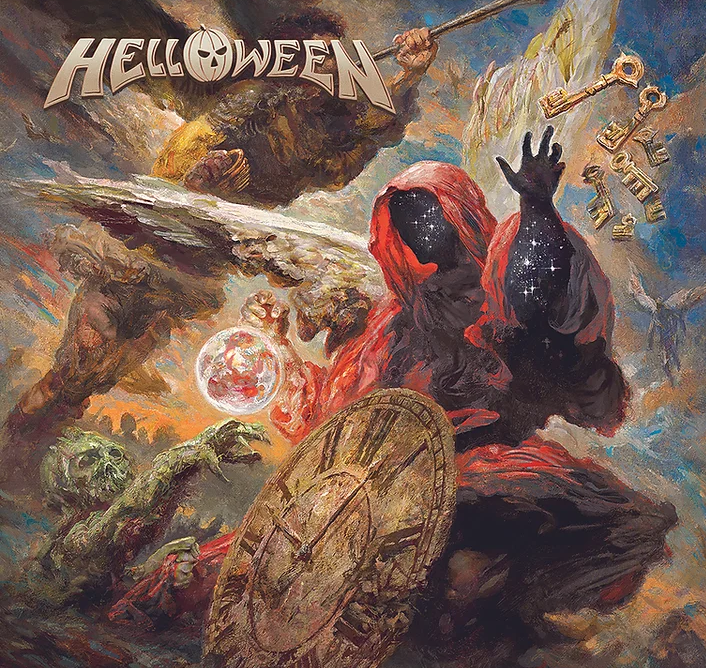

In [ ]:
imagem = cv2.imread('/content/CAPA.png')
cv2_imshow(imagem)

# Geração da WORDCLOUD

### Stopwords

A elaboração de uma *wordcloud* neste estudo tem o objetivo de destacar as palavras mais frequentes nas letras das músicas da banda. Com base na recorrência dessas palavras, é possível compreender o tema das canções, como alegria, protesto, sentimentos, entre outros. <BR/>No entanto, reconhecemos que, assim como em qualquer texto, existem termos como artigos, pronomes e preposições em português (um, a, uma, eu, para, aquele, o, etc) que ocorrem com muita frequência, mas não contribuem para determinar o sentido das composições.<BR/> Para lidar com esse problema, utilizamos a ferramenta `STOPWORDS`, que permite eliminar esses termos da lista de palavras relevantes..

Após o carregamento dos demais pacotes (nativos e instalados previamente), e a eliminação das *stopwords*, nosso *dataset* está pronto para a representação gráfica.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Listando os 5 primeiros tokens da lista, temos:


In [ ]:
tokens[:5]

['fight', 'hard', 'live', 'fast', 'play']

Note que são palavras, separadas por vírgula. Vamos novamente utilizar o comando `join`para tranformar essas palavras em uma única frase, neste caso, chamada de `palavras_helloween`.

In [ ]:
palavras_helloween = " ".join(tokens)

Fazendo uma busca nos 40 primeiros caracteres temos:

In [ ]:
palavras_helloween[:40]

'fight hard live fast play loud step out '

Note que os 40 caracteres são formados pelas letras + os espaços entre as palavras. (A contagem agora é por letra e não mais por termo).

### Nuvem de palavras - Sem máscara


Vamos gerar a nossa primeira nuvem de palavras, na configuração padrão, utilizando-se do conjunto de dados já tratado, `palavras_helloween`.

In [ ]:
wordcloud = WordCloud(background_color = 'black',
                random_state=42).generate(palavras_helloween)

Mostrando a imagem:



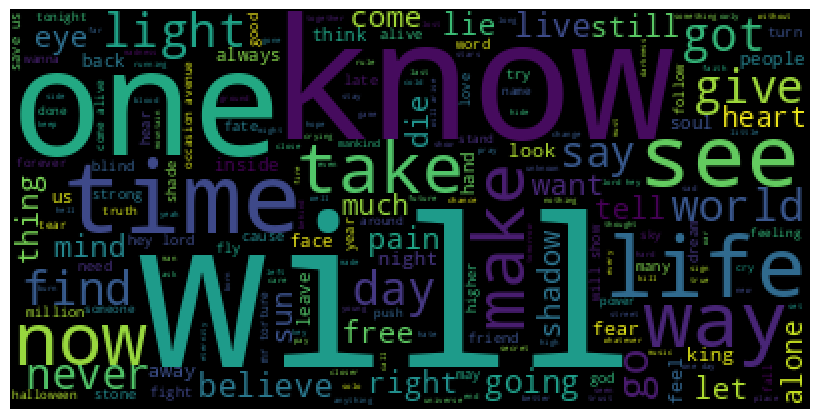

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Já conseguimos observar e saber quais as palavras mais recorrentes nas letras da banda, de acordo com o tamanho que elas aparecem na imagem.

### Nuvem de palavras - Com máscara

Para gerar uma imagem ainda mais personalizada e estilosa, vamos adicionar uma imagem, chamada de máscara, mesclada ao conjunto de palavras, mostrando a informação de uma maneira mais atraente.

### Conceito de máscara
Uma "mask image", em tradução livre para o português, seria uma imagem de máscara em preto e branco.

É uma imagem binária que é usada para selecionar determinadas partes de uma imagem original. Nesse contexto é aquela que contém apenas dois valores de pixel possíveis: preto e branco (ou 0 e 1, respectivamente).

Em nosso  caso, ao inserir o desenho na nuvem, o trecho com pixels brancos, ficará vazio, e o trecho com pixels pretos, preeenchido com as palavras. Ou seja, a nuvem de palavras terá a forma do trecho de cor preta da imagem importada.

Para o nosso exemplo vamos utilizar o logo do Helloween com grafia em pixels brancos




<center><img alt="Helloween Logo" width="50%" src="https://i.pinimg.com/originals/5d/04/2e/5d042ede002ae9298c44010e0142a333.jpg"></center>

Para importação da imagem, salvamos a mesma no Google Drive e direcionamos o link para carregar a `imagem_mascara`

In [ ]:
imagem_mascara = np.array(Image.open("/content/logo.jpg"))

imagem_mascara

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Gerando novamente a nuvem de palavras, agora com a inserção da máscara e fazendo algumas personalizações no *Matplotlib* [vide documentação](https://matplotlib.org/stable/tutorials/colors/colormaps.html) como a quantidade máxima de palavras e a cor da fonte, temos:

In [ ]:
wordcloud = WordCloud(background_color = 'white',
                    max_words = 1000,
                    mask=imagem_mascara,
                    colormap='inferno',
                    random_state=42).generate(palavras_helloween)

Mostrando a imagem:

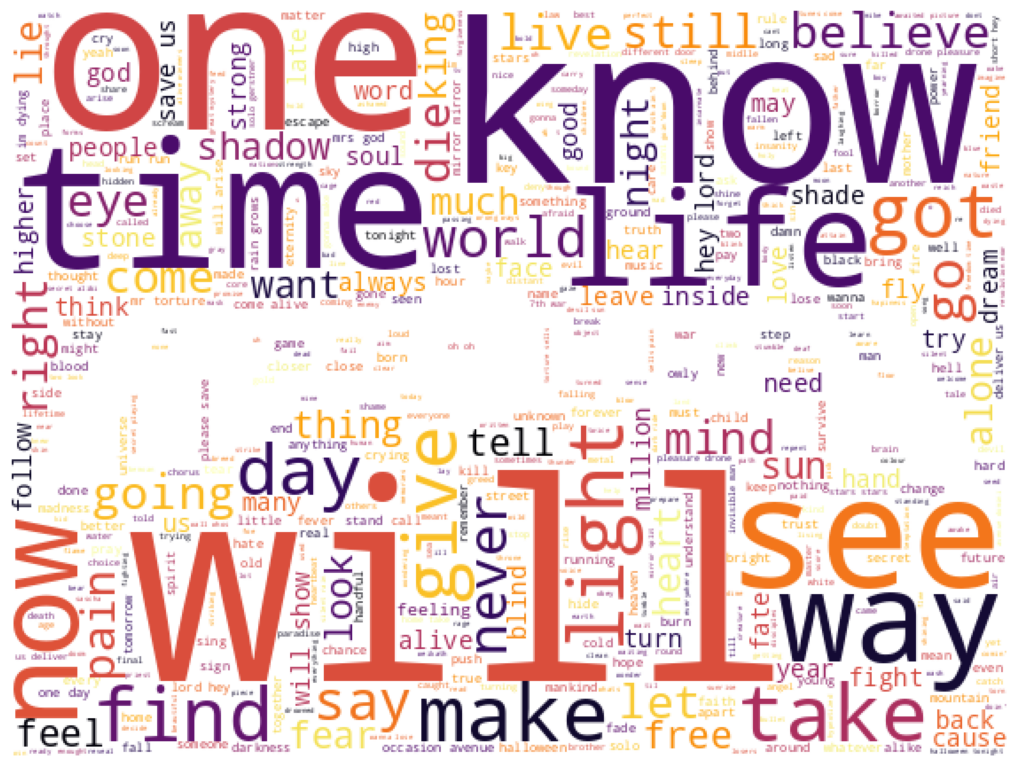

In [ ]:

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Contagem global das palavras

Aqui vamos listar e quantificar todas as palavras presentes no *dataset*

In [ ]:
from collections import Counter
helloween_count = Counter (tokens)
helloween_count.most_common()

[('the', 601),
 ('i', 435),
 ('you', 372),
 ('to', 326),
 ('and', 282),
 ('a', 234),
 ('of', 206),
 ('your', 196),
 ('we', 190),
 ('will', 187),
 ('in', 179),
 ('is', 158),
 ('my', 153),
 ('be', 147),
 ('for', 147),
 ('me', 139),
 ('all', 134),
 ('it', 108),
 ('-', 108),
 ('on', 103),
 ('one', 93),
 ('know', 87),
 ('time', 86),
 ("it's", 84),
 ('that', 81),
 ('no', 81),
 ("don't", 78),
 ('so', 77),
 ('but', 76),
 ('are', 75),
 ("i'm", 75),
 ('more', 71),
 ('see', 65),
 ('can', 64),
 ('if', 63),
 ('there', 63),
 ('what', 62),
 ('just', 61),
 ('down', 57),
 ('have', 57),
 ('life', 56),
 ('his', 48),
 ('do', 47),
 ('our', 46),
 ('with', 46),
 ('by', 45),
 ('way', 44),
 ('or', 44),
 ('how', 43),
 ('day', 42),
 ('from', 41),
 ('take', 41),
 ('now', 40),
 ('make', 40),
 ('out', 39),
 ('they', 38),
 ('not', 37),
 ('could', 37),
 ('here', 37),
 ('got', 36),
 ('light', 36),
 ("there's", 35),
 ("can't", 35),
 ('come', 35),
 ('us', 34),
 ("we're", 33),
 ('never', 33),
 ('this', 33),
 ('go', 33),


Como podemos perceber pela contagem, ainda temos uma série de artigos e preposições presentes em grande quantidade na lista. Faremos uma nova limpeza (`STOPWORDS`), indicando quais as palavras devem ser eliminadas, desta forma, deixando nossa imagem menos poluída.

In [ ]:
stopwords_customizada = STOPWORDS.union({'the', 'you', 'and', 'to', 'a', 'my','I', 'it','this', 'that'})

Gerando a imagem, após nova limpeza:

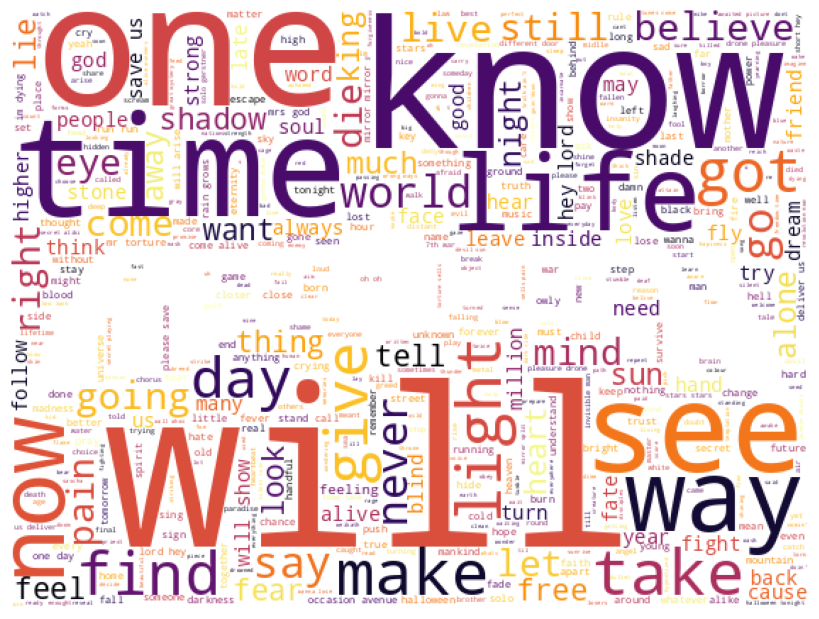

In [ ]:
wordcloud = WordCloud(background_color = 'white',
                stopwords = stopwords_customizada,
                max_words = 1000,
                mask=imagem_mascara,
                colormap='inferno',
                random_state=42).generate(palavras_helloween)

# Mostrando a imagem
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Imagem final

Para fazer a exportação, vamos definir alguns parâmetros:
* Alterar a cor de fundo para preto em `background_color`;
* Inserir um contorno vermelho aos pixels brancos da máscara em `countour_width`e `contour_color`;
*Alterar a cor das letras das palavras para tons de azul em `colormap;`


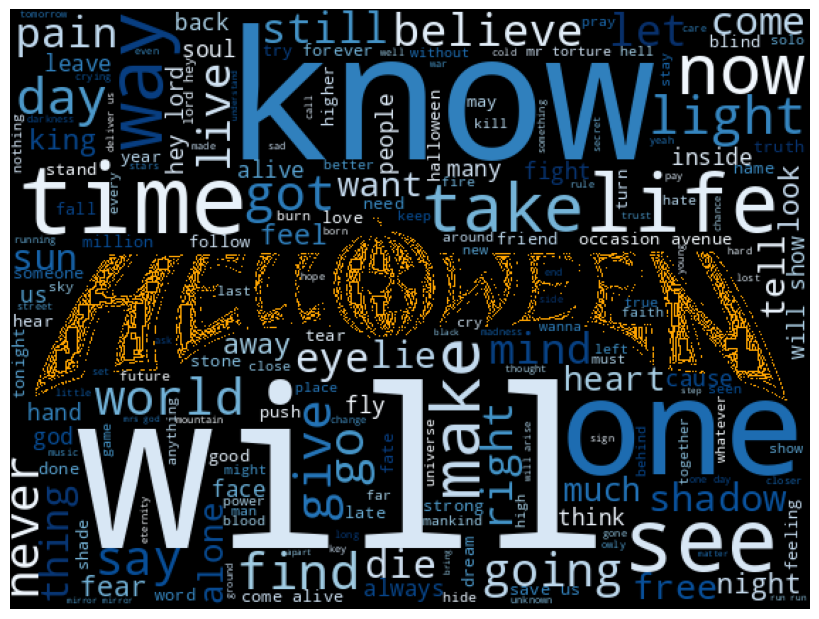

In [ ]:
wordcloud = WordCloud(background_color = 'black',
                stopwords = stopwords_customizada,
                contour_width = 0.2,
                contour_color  = 'orange',
                mask=imagem_mascara,
                colormap='Blues',
                random_state=44).generate(palavras_helloween)

# Mostrando a imagem
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Exportação da imagem

Após finalizada, a imagem pode ser exportada e baixada para o terminal  ou disco virtual. Neste caso, optamos em salvá-la em formato *.png* direto para o Google Drive.

In [ ]:
wordcloud.to_file('/content/helloween.jpg')

# Conclusão

Podemos observar que a visualização por nuvem de palavras (wordcloud) é uma excelente maneira de estudar a recorrência de termos, como neste caso. É visualmente fácil perceber quais palavras mais se repetem no dataset e entender o teor das composições da banda. <br/>Palavras em evidência como **know, will, own, see, time, take, life, believe, now** nos mostram que as letras do Helloween não são necessariamente tristes ou revoltadas, refutando a ideia de que o Heavy Metal precisa ser sombrio.

Ao analisar esses termos, podemos inferir que as letras falam sobre **conhecimento, vontade, autoafirmação, tempo, aproveitar a vida, acreditar e viver o momento presente**. <br/>O Helloween demonstra uma abordagem mais otimista e inspiradora em suas composições, mostrando que o Heavy Metal pode abordar uma ampla gama de temas, indo além de tristeza e revolta.

É importante ressaltar que, assim como outras bandas, o Helloween também conquista fãs através de performances excepcionais e um apelo visual marcante.<br/> No entanto, a banda opta por transmitir uma mensagem de esperança, força e empoderamento, atraindo um público diverso que busca tanto a energia do Heavy Metal quanto **mensagens positivas e motivadoras.**

Dessa forma, o Helloween demonstra que é possível desafiar estereótipos e apresentar um Heavy Metal que transcende o "down", oferecendo uma perspectiva diferente e inspiradora para seus ouvintes.

*Yeah, it's HALLOWEEN*

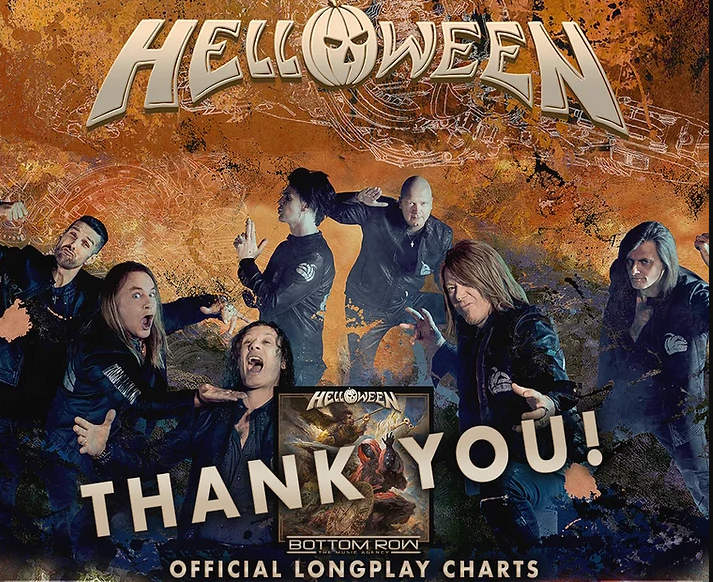

In [ ]:
imagem = cv2.imread('/content/final.png')
cv2_imshow(imagem)

Shows no Brasil

O Helloween e o Hammerfall, estão em turnê juntos e realizaram shows no Brasil, proporcionando aos fãs de Heavy Metal uma experiência empolgante. Os espetáculos foram marcados por performances enérgicas, repertório repleto de clássicos e produções visuais impressionantes. A união das duas bandas no palco resultou em momentos únicos de colaboração, elevando a emoção e deixando uma marca duradoura nos fãs brasileiros.


 Ambas as bandas são conhecidas por sua habilidade no palco, proporcionando um espetáculo musical de alta qualidade. Os fãs puderam desfrutar de um repertório repleto de clássicos do Helloween, como "I Want Out", "Eagle Fly Free" e "Keeper of the Seven Keys", além das poderosas músicas do Hammerfall, como "Hearts on Fire" e "Any Means Necessary".

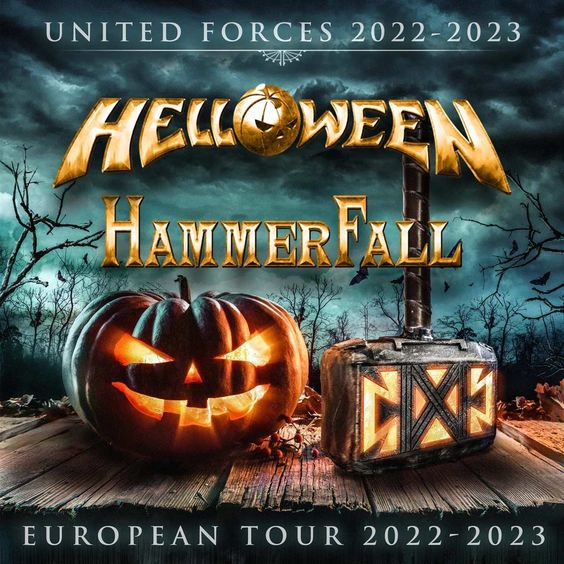

In [ ]:
imagem = cv2.imread('/content/HELL HAMM.jpg')
cv2_imshow(imagem)